cheby2——cheby2

低通切比雪夫 II 型传递函数

In [1]:
from scipy.signal import cheby2, freqz, butter,zpk2sos
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 定义参数
fc = 300  # 截止频率
fs = 1000  # 采样频率

# 设计低通切比雪夫II型滤波器
[b, a] = cheby2(6, 50, fc / (fs / 2))

# 计算频率响应
w, h = freqz(b, a, worN=8000, fs=fs)


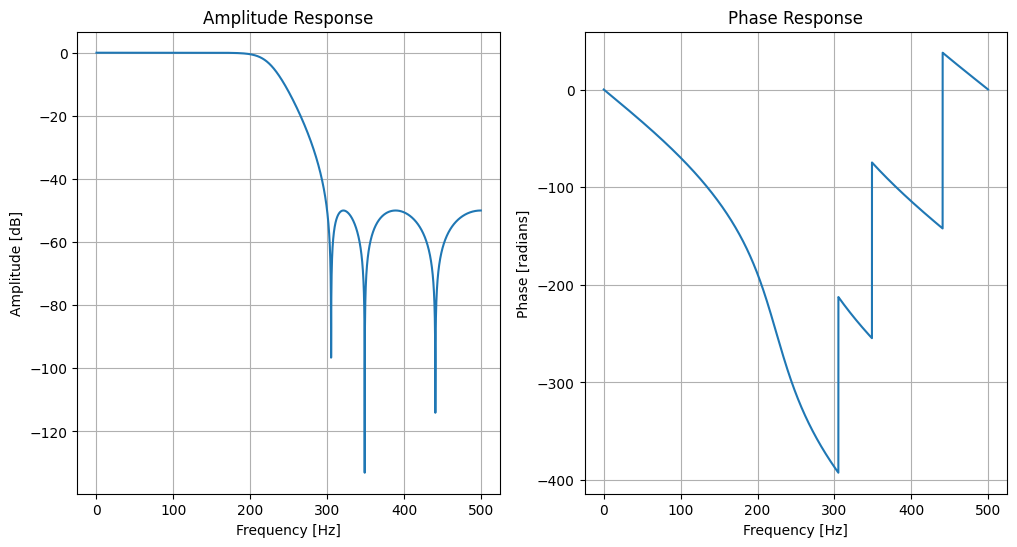

In [3]:
# 绘制幅度和相位响应
plt.figure(figsize=(12, 6))

# 幅度响应
plt.subplot(1, 2, 1)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Amplitude Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid()

# 相位响应
plt.subplot(1, 2, 2)
plt.plot(w, np.degrees(np.unwrap(np.angle(h))))
plt.title('Phase Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid()
plt.show()


带阻切比雪夫 II 型滤波器

In [4]:
# 定义参数
order = 3  # 滤波器阶数
ripple = 50  # 通带纹波，以dB为单位
stop_freqs = [0.2, 0.6]  # 阻带边缘频率
stop_band = 'stop'  # 阻带类型

# 设计切比雪夫II型带阻滤波器
[b, a] = cheby2(order, ripple, stop_freqs, btype=stop_band)

# 计算频率响应
w, h = freqz(b, a)

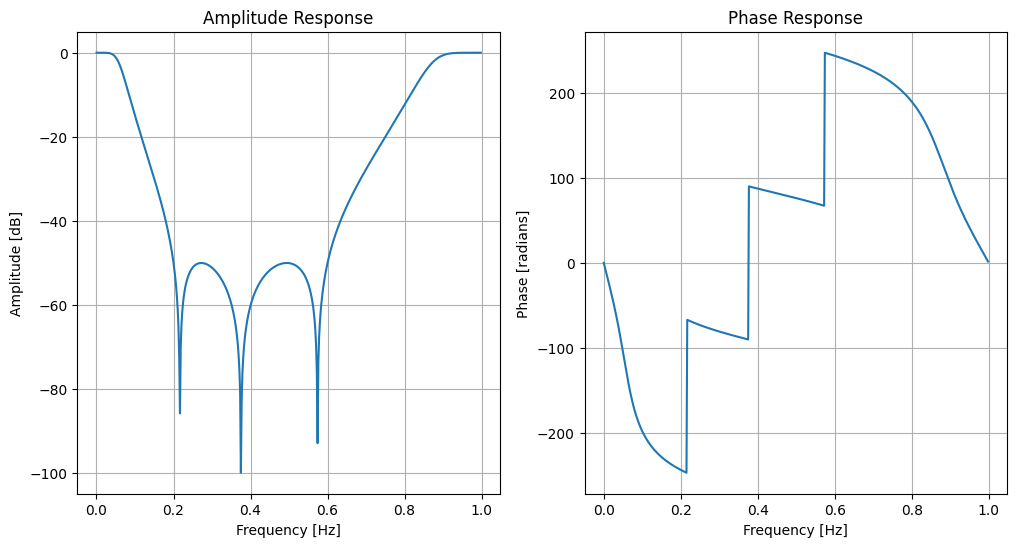

In [5]:
# 绘制幅度和相位响应
plt.figure(figsize=(12, 6))

# 幅度响应
plt.subplot(1, 2, 1)
plt.plot(w/np.pi, 20 * np.log10(abs(h)))
plt.title('Amplitude Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid()

# 相位响应
plt.subplot(1, 2, 2)
plt.plot(w/np.pi,np.degrees(np.unwrap(np.angle(h))))
plt.title('Phase Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid()
plt.show()

高通切比雪夫II型滤波器

In [6]:
# 重新设计高通切比雪夫II型滤波器
order = 9
ripple = 20
cutoff_freq = 300/500
b, a = cheby2(order, ripple, cutoff_freq, btype='high')

# 计算频率响应
w, h = freqz(b,a, worN=1000)


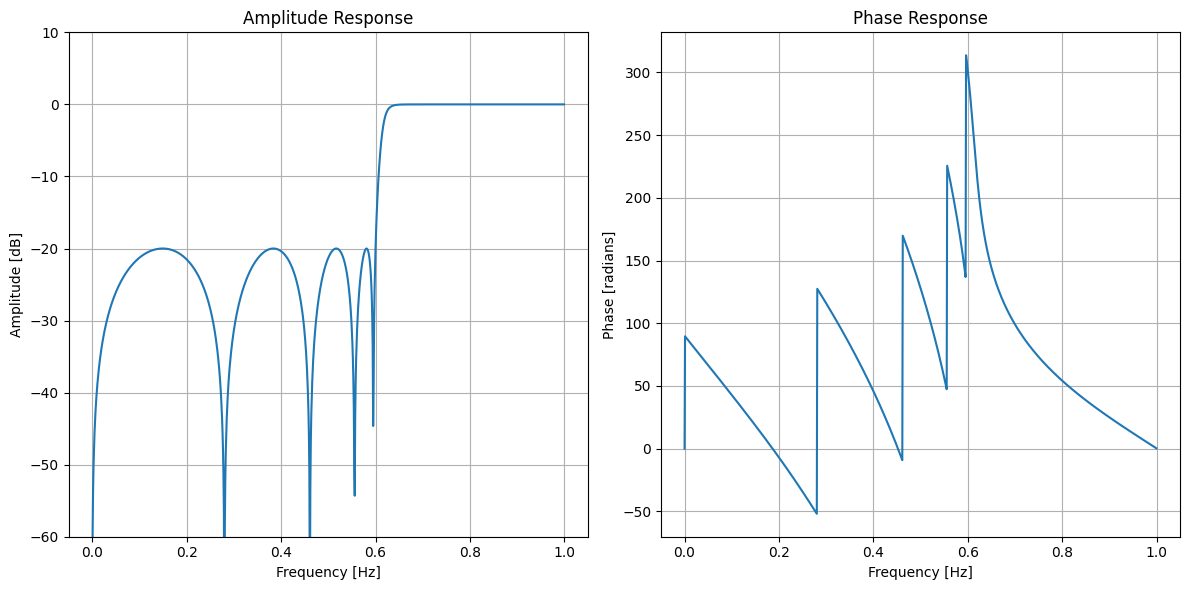

In [7]:
# 重新绘制幅度和相位响应
plt.figure(figsize=(12, 6))
# 幅度响应
plt.subplot(1, 2, 1)
plt.plot(w/np.pi, 20 * np.log10(abs(h)))
plt.title('Amplitude Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.ylim(-60, 10)  # 设置y轴范围

# 相位响应
plt.subplot(1, 2, 2)
plt.plot(w/np.pi,np.degrees(np.unwrap(np.angle(h))))
plt.title('Phase Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid()

plt.tight_layout()
plt.show()

带通切比雪夫 II 型滤波器

In [8]:
# 定义参数
order = 10  # 滤波器阶数
ripple = 40  # 阻带衰减，以dB为单位
fs = 1500  # 采样频率
cutoff_freqs = [500, 560]  # 阻带边缘频率
cutoff_freqs = [x /(fs/2) for x in cutoff_freqs] 


# 设计切比雪夫II型带通滤波器
b ,a = cheby2(order, ripple, cutoff_freqs, btype='bandpass')

# 计算频率响应
w, h = freqz(b, a, worN=8000, fs=fs)

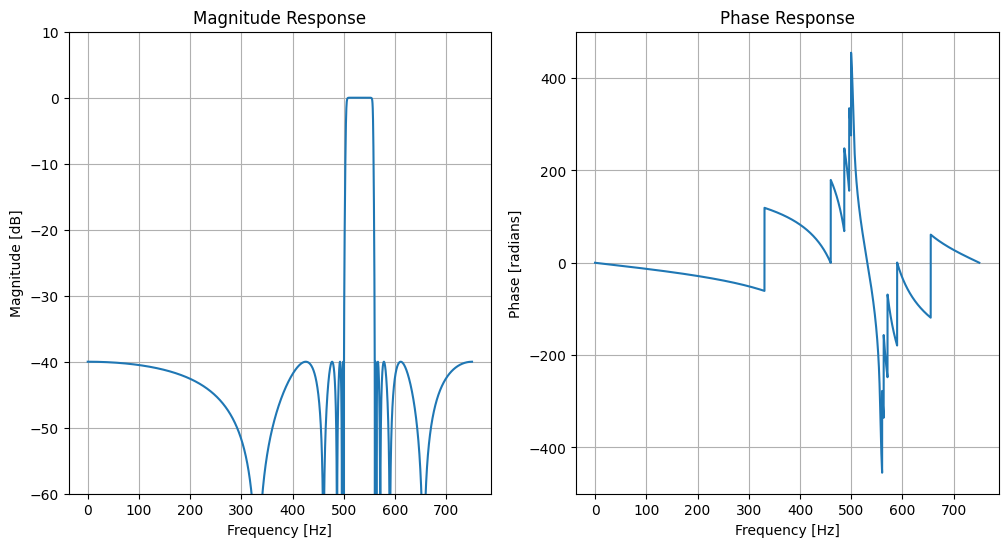

In [9]:
# 重新绘制幅度和相位响应
plt.figure(figsize=(12, 6))
# 幅度响应
plt.subplot(1, 2, 1)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Magnitude Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()
plt.ylim(-60, 10)  # 设置y轴范围

# 相位响应
plt.subplot(1, 2, 2)
plt.plot(w,np.degrees(np.unwrap(np.angle(h))))
plt.title('Phase Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid()
plt.show()

模拟IIR低通滤波器的比较

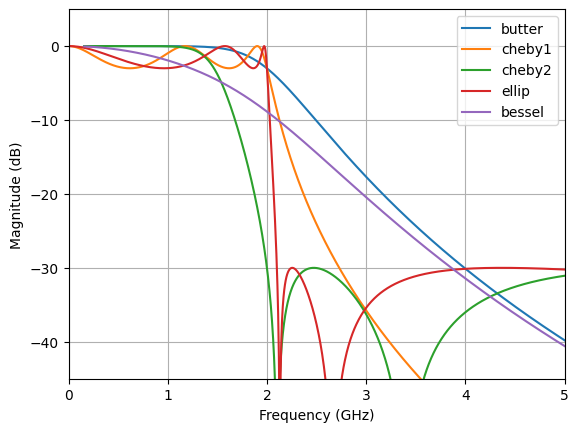

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, lfilter, freqz,ellip, zpk2sos

# 定义参数
n = 5
fc = 2e9

b1, a1 = signal.butter(n, 2*np.pi*fc, 'low', analog=True)
w1, h1 = signal.freqs(b1, a1, worN = 4096)

b2, a2 = signal.cheby1(n, 3, 2*np.pi*fc, 'low', analog=True)
w2, h2 = signal.freqs(b2, a2, worN = 4096)

b3, a3 = signal.cheby2(n, 30, 2*np.pi*fc, 'low', analog=True)
w3, h3 = signal.freqs(b3, a3, worN = 4096)

b4, a4 = signal.ellip(n, 3, 30, 2*np.pi*fc, 'low', analog=True)
w4, h4 = signal.freqs(b4, a4, worN = 4096)

b5, a5 = signal.bessel(n, 2*np.pi*fc, 'low', analog=True)
w5, h5 = signal.freqs(b5, a5, worN = 4096)

# 绘制频率响应图
plt.figure()
plt.plot(w1/(2e9*np.pi), 20 * np.log10(np.abs(h1)), label='butter')
plt.plot(w2/(2e9*np.pi), 20 * np.log10(np.abs(h2)), label='cheby1')
plt.plot(w3/(2e9*np.pi), 20 * np.log10(np.abs(h3)), label='cheby2')
plt.plot(w4/(2e9*np.pi), 20 * np.log10(np.abs(h4)), label='ellip')
plt.plot(w5/(2e9*np.pi), 20 * np.log10(np.abs(h5)), label='bessel')

# 设置坐标轴范围和标签
plt.axis([0, 5, -45, 5])
plt.grid(True)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Magnitude (dB)')
plt.legend()

# 显示图表
plt.show()